In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('gym_members_exercise_tracking.csv')

df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [28]:
# Enhanced preprocessing script for the gym members dataset

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('gym_members_exercise_tracking.csv')  # Load the raw dataset

# Check for missing values
missing_values = df.isnull().sum()  # Count missing values in each column

# Handle missing values
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns 
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns 

# Fill missing numeric values with median
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median()) 
# Fill missing categorical values with mode
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0]) 


# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'Workout_Type'], drop_first=True)  # One-hot encode categorical features

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 
                      'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 
                      'Workout_Frequency (days/week)', 'BMI']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])  # Scale numerical features

# Feature Engineering
df_encoded['Heart_Rate_Zone'] = pd.cut(df['Max_BPM'], bins=[0, 120, 160, 200], labels=['Fat-Burning', 'Cardio', 'Peak'])  # Add heart rate zone feature
df_encoded['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 50], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])  # Add BMI category feature
df_encoded['Activity_Score'] = df['Workout_Frequency (days/week)'] * df['Session_Duration (hours)']  # Add activity score

# Encode new categorical features
df_encoded = pd.get_dummies(df_encoded, columns=['Heart_Rate_Zone', 'BMI_Category'], drop_first=True)  # Encode new categorical features

# Save the enhanced processed dataset
processed_file_path = 'enhanced_processed_gym_data.csv'  # Filepath for the processed dataset
df_encoded.to_csv(processed_file_path, index=False)  # Save the processed dataset to a CSV file

# Display a sample of the processed data
from tabulate import tabulate
print(tabulate(df_encoded.head(), headers='keys', tablefmt='psql'))  # Display the first few rows for verification




+----+------------+---------------+--------------+------------+-----------+---------------+----------------------------+-------------------+------------------+-------------------------+---------------------------------+--------------------+------------+---------------+---------------------+-------------------------+---------------------+------------------+--------------------------+------------------------+-----------------------+---------------------------+----------------------+
|    |        Age |   Weight (kg) |   Height (m) |    Max_BPM |   Avg_BPM |   Resting_BPM |   Session_Duration (hours) |   Calories_Burned |   Fat_Percentage |   Water_Intake (liters) |   Workout_Frequency (days/week) |   Experience_Level |        BMI | Gender_Male   | Workout_Type_HIIT   | Workout_Type_Strength   | Workout_Type_Yoga   |   Activity_Score | Heart_Rate_Zone_Cardio   | Heart_Rate_Zone_Peak   | BMI_Category_Normal   | BMI_Category_Overweight   | BMI_Category_Obese   |
|----+------------+---------

In [29]:
# display data with info
exercise_df = pd.read_csv('gym_members_exercise_tracking.csv')
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [30]:
# check missing and null vals
print(f'Missing values:\n{exercise_df.isnull().sum()}\n')
print(f'Total duplicates: {exercise_df.duplicated().sum()}\n')
# turn resting bpm into binary
exercise_df['Resting_BPM'] = exercise_df['Resting_BPM'].apply(lambda x: 0 if x >= 60 else 1)

Missing values:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

Total duplicates: 0



In [31]:
# encode categorical
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder()
exercise_df['Gender'] = gender_encoder.fit_transform(exercise_df['Gender'])
workout_encoder = LabelEncoder()
exercise_df['Workout_Type'] = workout_encoder.fit_transform(exercise_df['Workout_Type'])
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    int64  
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    int64  
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

Text(0.5, 1.0, 'Gym Member Exercise Correlation Heatmap')

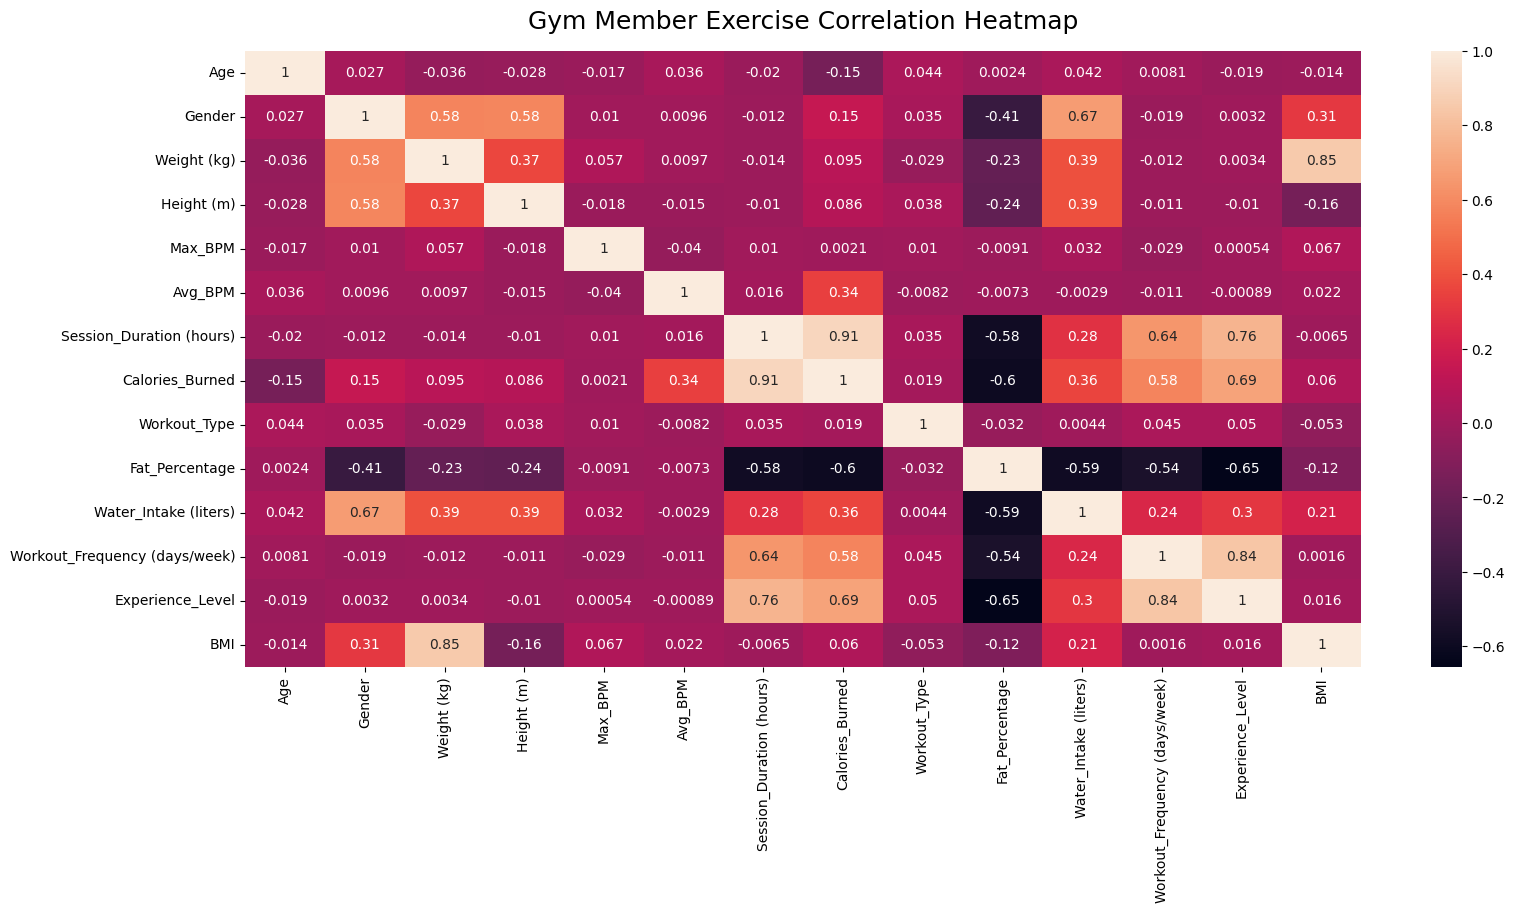

In [32]:
# check correlations using heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,8))
features = exercise_df.drop('Resting_BPM', axis=1)
exercise_plt = sns.heatmap(features.corr(), annot=True)
exercise_plt.set_title('Gym Member Exercise Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

Text(0.5, 0, 'Height')

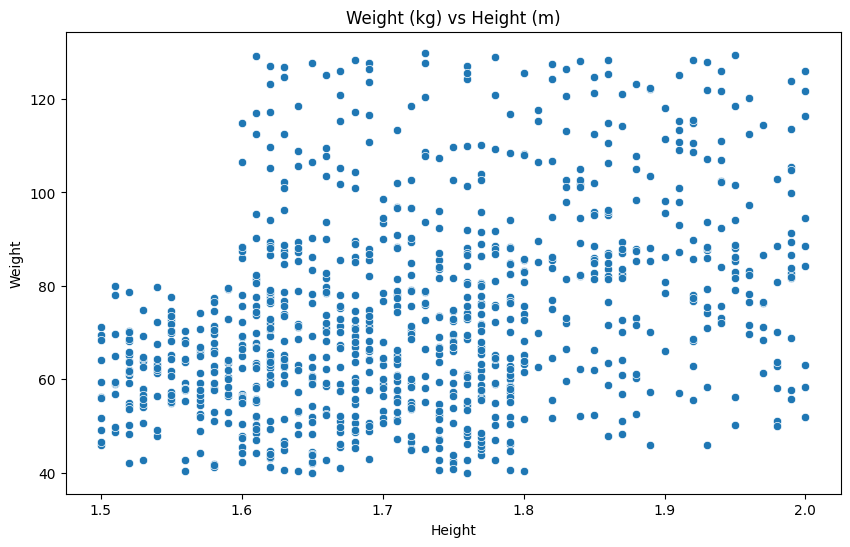

In [33]:
# explore correlations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=exercise_df, y='Weight (kg)', x='Height (m)')
plt.title('Weight (kg) vs Height (m)')
plt.ylabel('Weight')
plt.xlabel('Height')

In [34]:
# remove highly correlated (>0.80)
exercise_df.drop('Session_Duration (hours)', axis=1, inplace=True)
exercise_df.drop('Weight (kg)', axis=1, inplace=True)
exercise_df.drop('Experience_Level', axis=1, inplace=True)

Text(0.5, 1.0, 'BMI Range Counts')

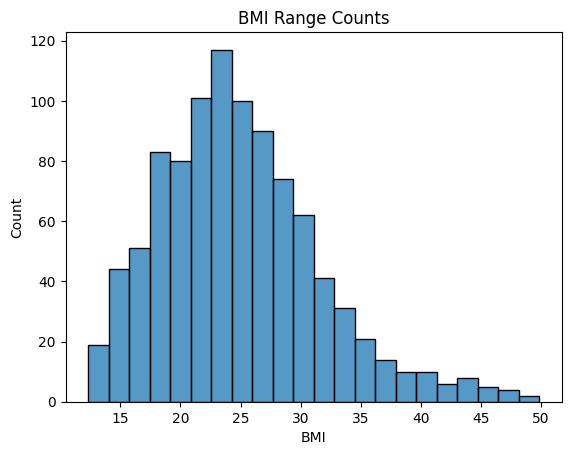

In [35]:
sns.histplot(data=exercise_df, x='BMI')
plt.title('BMI Range Counts')

In [36]:
# scale features using standard scaler
from sklearn.preprocessing import StandardScaler
targets = exercise_df['Resting_BPM']

standard_scale = StandardScaler()
features_scaled = standard_scale.fit_transform(features)

In [37]:
# check for inbalance in threshold
class_distribution = exercise_df['Resting_BPM'].value_counts()
print(f'patients with(1) and without(2) low BPM:\n{class_distribution}')

patients with(1) and without(2) low BPM:
Resting_BPM
0    600
1    373
Name: count, dtype: int64


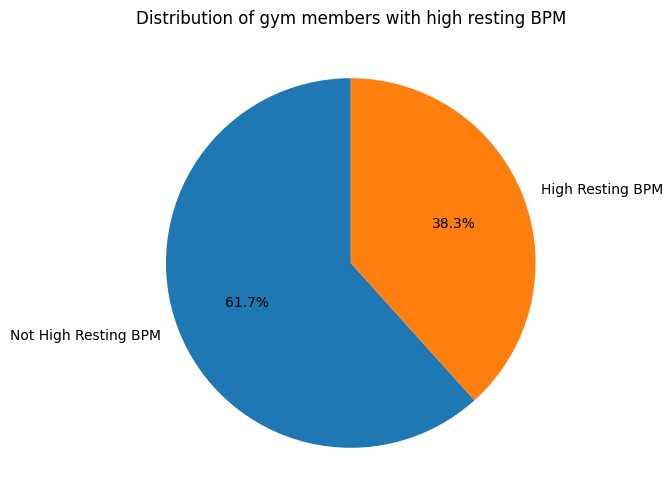

In [38]:
# visualize distribution
import matplotlib.pyplot as plt
class_mapping = {1: 'High Resting BPM', 0: 'Not High Resting BPM'}
labels = class_distribution.index.map(class_mapping)
plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of gym members with high resting BPM')
plt.show()

In [39]:
# balance classes using SMOTE
from imblearn.over_sampling import SMOTE

features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(features_scaled_df, targets)

exercise_df = pd.concat([pd.DataFrame(x_resampled, columns=features_scaled_df.columns), pd.DataFrame(y_resampled, columns=['Resting_BPM'])], axis=1)
class_distribution = exercise_df['Resting_BPM'].value_counts()
print(f'patients with(1) and without(2) liver disease:\n{class_distribution}')

patients with(1) and without(2) liver disease:
Resting_BPM
0    600
1    600
Name: count, dtype: int64


In [40]:
# split into training and testing
from sklearn.model_selection import train_test_split
train_features, test_features, train_targets, test_targets = train_test_split(x_resampled, y_resampled, train_size=.8, random_state=42)

In [41]:
# use knn to predict if a member has a low resting BPM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(train_features, train_targets)
print(f"Best Parameters: {grid_search.best_params_}")
best_knn = grid_search.best_estimator_
knn = best_knn.fit(train_features, train_targets)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


K Neighbors Scores:
accuracy: 0.6791666666666667
precision: 0.8125
recall: 0.6624203821656051
f1 score: 0.7298245614035088
confusion matrix:
[[ 59  24]
 [ 53 104]]



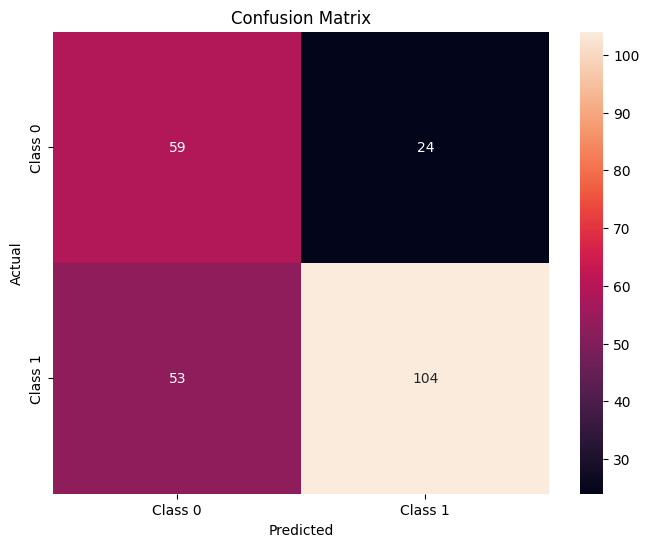

In [42]:
# make predictions using test data
knn_predict = knn.predict(test_features)

# evaluate each model using metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
knn_acc = accuracy_score(knn_predict, test_targets)
knn_precision = precision_score(knn_predict, test_targets)
knn_recall = recall_score(knn_predict, test_targets)
knn_f1 = f1_score(knn_predict, test_targets)
knn_matrix = confusion_matrix(knn_predict, test_targets)

print('K Neighbors Scores:')
print(f'accuracy: {knn_acc}\nprecision: {knn_precision}\nrecall: {knn_recall}\nf1 score: {knn_f1}\nconfusion matrix:\n{knn_matrix}\n')

class_labels = ['Class 0', 'Class 1']
plt.figure(figsize=(8, 6))
sns.heatmap(knn_matrix, annot=True, fmt='d',
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()